In [3]:
import pandas as pd
from pathlib import Path
import re


In [4]:
ROOT = Path("data_res")  # run from repo root

def _slug(s: str) -> str:
    """Make a python-identifier-friendly slug."""
    s = s.lower()
    s = re.sub(r"\.csv$", "", s)
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    if not s:
        s = "csv"
    if s[0].isdigit():
        s = "x_" + s
    return s

def make_var_name(run_folder: str, csv_name: str) -> str:
    """
    Example:
      run_folder = '20260209_104612_efficientnet_b4_seed42'
      csv_name   = 'metrics.csv'
      -> efficientnet_b4_seed42_metrics
    """
    # remove leading timestamp-like prefix if present (YYYYMMDD_HHMMSS_)
    run = re.sub(r"^\d{8}_\d{6}_", "", run_folder)
    return _slug(f"{run}_{csv_name}")

csv_paths = sorted(ROOT.rglob("*.csv"))
if not csv_paths:
    raise FileNotFoundError(
        f"No CSVs found under {ROOT.resolve()}. "
        "Double-check folder name (maybe 'data_results'?) and run from repo root."
    )

tables = {}   # var_name -> DataFrame
collisions = {}  # base_name -> count

for p in csv_paths:
    df = pd.read_csv(p)

    base = make_var_name(p.parent.name, p.name)
    name = base

    # Handle name collisions (e.g., duplicate filenames across folders that slug to same)
    if name in tables:
        collisions[base] = collisions.get(base, 1) + 1
        name = f"{base}_{collisions[base]}"

    # Add minimal provenance columns (optional but helpful)
    df = df.copy()
    df["__run_folder"] = p.parent.name
    df["__file"] = p.name
    df["__path"] = str(p)

    # Save in dict and also create a global variable with that name
    tables[name] = df
    globals()[name] = df

print(f"Loaded {len(tables)} CSVs into variables + dict `tables`.\n")
print("Example variable names:")
for k in list(tables.keys())[:15]:
    print(" -", k)

# Usage:
#   efficientnet_b4_seed42_metrics.head()
#   tables["efficientnet_b4_seed42_metrics"].describe()



Loaded 6 CSVs into variables + dict `tables`.

Example variable names:
 - convnext_t_seed42_auc_by_epoch
 - resnet34_seed42_auc_by_epoch
 - vgg19_hf_seed42_auc_by_epoch
 - efficientnet_b4_seed42_auc_by_epoch
 - swin_tiny_seed42_auc_by_epoch
 - deit_small_seed42_auc_by_epoch


                          table_key               model_id  n_rows  epochs  best_epoch_val_macro  best_val_macro_auc
     deit_small_seed42_auc_by_epoch      201733_deit_small     264      11                     8            0.785320
      swin_tiny_seed42_auc_by_epoch       123353_swin_tiny     264      11                     9            0.784481
     convnext_t_seed42_auc_by_epoch      192713_convnext_t     264      11                     8            0.783509
       resnet34_seed42_auc_by_epoch        221318_resnet34     264      11                     9            0.775958
efficientnet_b4_seed42_auc_by_epoch 104612_efficientnet_b4     264      11                     9            0.773645
       vgg19_hf_seed42_auc_by_epoch        225726_vgg19_hf     264      11                     8            0.765608


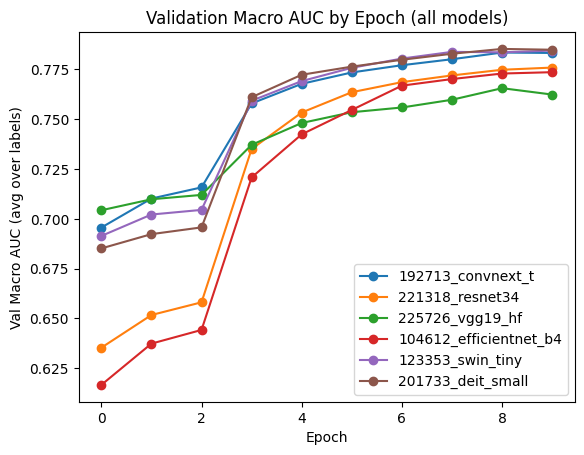


[192713_convnext_t] Best epoch = 8, Val macro AUC = 0.7835
Top labels:
      group_name      auc
Pleural Effusion 0.875640
      No Finding 0.869787
 Support Devices 0.862615
    Cardiomegaly 0.848119
    Pneumothorax 0.840064
Bottom labels:
                group_name      auc
                  Fracture 0.734672
             Consolidation 0.728364
              Lung Opacity 0.725428
               Atelectasis 0.677572
Enlarged Cardiomediastinum 0.669135


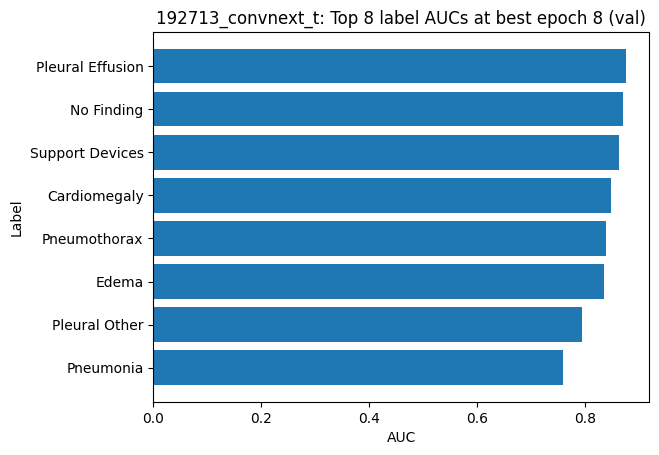


[221318_resnet34] Best epoch = 9, Val macro AUC = 0.7760
Top labels:
      group_name      auc
Pleural Effusion 0.873128
      No Finding 0.865942
 Support Devices 0.848551
    Cardiomegaly 0.844151
           Edema 0.832878
Bottom labels:
                group_name      auc
                  Fracture 0.732627
              Lung Opacity 0.719602
             Consolidation 0.717417
               Atelectasis 0.672285
Enlarged Cardiomediastinum 0.668077


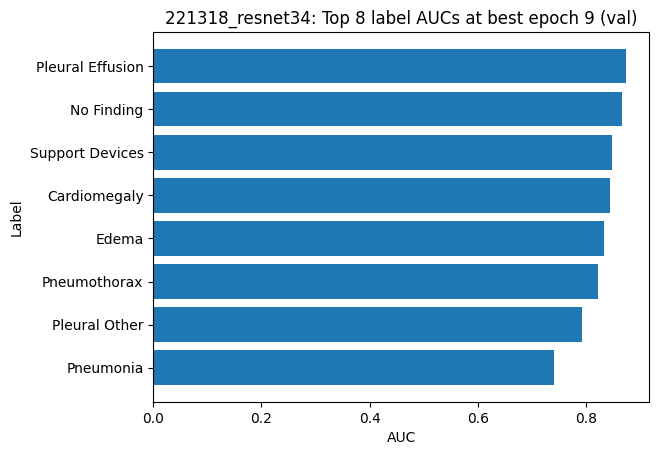


[225726_vgg19_hf] Best epoch = 8, Val macro AUC = 0.7656
Top labels:
      group_name      auc
Pleural Effusion 0.868071
      No Finding 0.862901
 Support Devices 0.853262
    Cardiomegaly 0.835981
           Edema 0.827688
Bottom labels:
                group_name      auc
                  Fracture 0.711426
               Lung Lesion 0.711150
             Consolidation 0.698105
               Atelectasis 0.669985
Enlarged Cardiomediastinum 0.631895


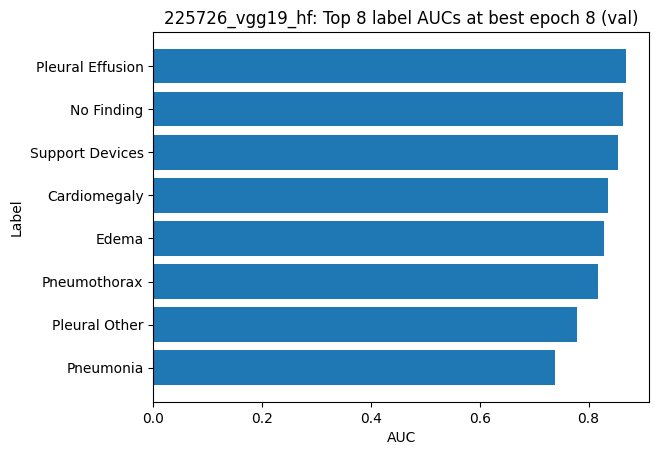


[104612_efficientnet_b4] Best epoch = 9, Val macro AUC = 0.7736
Top labels:
      group_name      auc
Pleural Effusion 0.872659
      No Finding 0.867620
 Support Devices 0.852713
    Cardiomegaly 0.837603
           Edema 0.834347
Bottom labels:
                group_name      auc
                  Fracture 0.726317
              Lung Opacity 0.719659
             Consolidation 0.714713
               Atelectasis 0.674880
Enlarged Cardiomediastinum 0.657430


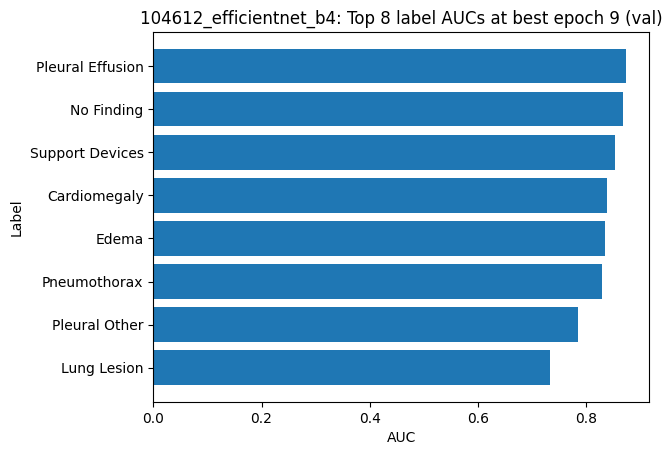


[123353_swin_tiny] Best epoch = 9, Val macro AUC = 0.7845
Top labels:
      group_name      auc
Pleural Effusion 0.876049
      No Finding 0.872140
 Support Devices 0.854651
    Pneumothorax 0.838976
    Cardiomegaly 0.838811
Bottom labels:
                group_name      auc
                  Fracture 0.748850
              Lung Opacity 0.725200
             Consolidation 0.722967
               Atelectasis 0.681862
Enlarged Cardiomediastinum 0.672153


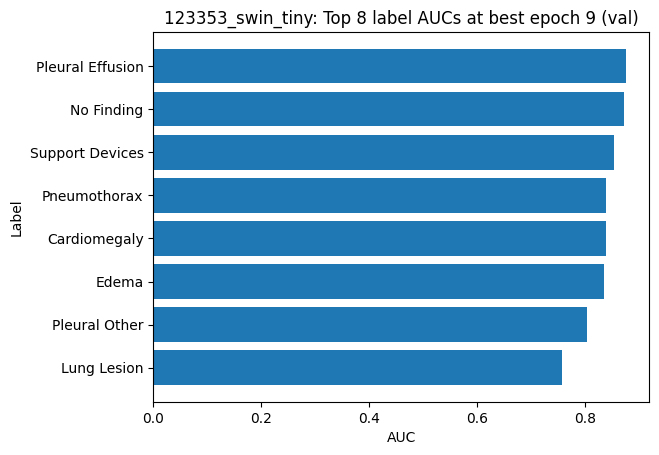


[201733_deit_small] Best epoch = 8, Val macro AUC = 0.7853
Top labels:
      group_name      auc
Pleural Effusion 0.876459
      No Finding 0.871261
 Support Devices 0.865858
    Cardiomegaly 0.851831
    Pneumothorax 0.838363
Bottom labels:
                group_name      auc
                  Fracture 0.740154
              Lung Opacity 0.725595
             Consolidation 0.725306
Enlarged Cardiomediastinum 0.680448
               Atelectasis 0.679270


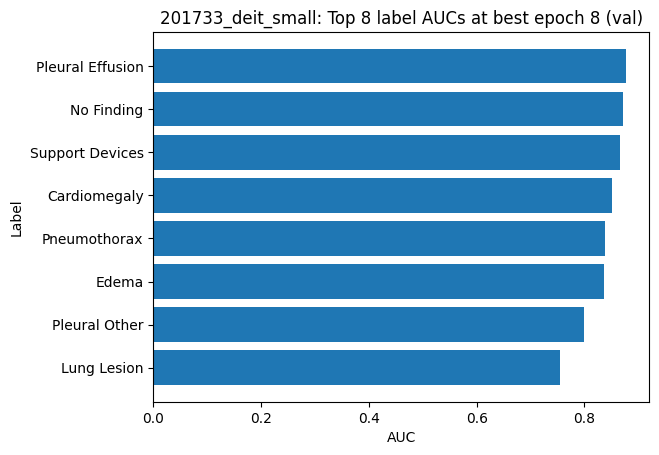


Label x Model AUC matrix (val at each model's best epoch):
                            192713_convnext_t  221318_resnet34  225726_vgg19_hf  104612_efficientnet_b4  123353_swin_tiny  201733_deit_small
group_name                                                                                                                                  
Atelectasis                          0.677572         0.672285         0.669985                0.674880          0.681862           0.679270
Cardiomegaly                         0.848119         0.844151         0.835981                0.837603          0.838811           0.851831
Consolidation                        0.728364         0.717417         0.698105                0.714713          0.722967           0.725306
Edema                                0.835773         0.832878         0.827688                0.834347          0.836364           0.836463
Enlarged Cardiomediastinum           0.669135         0.668077         0.631895               

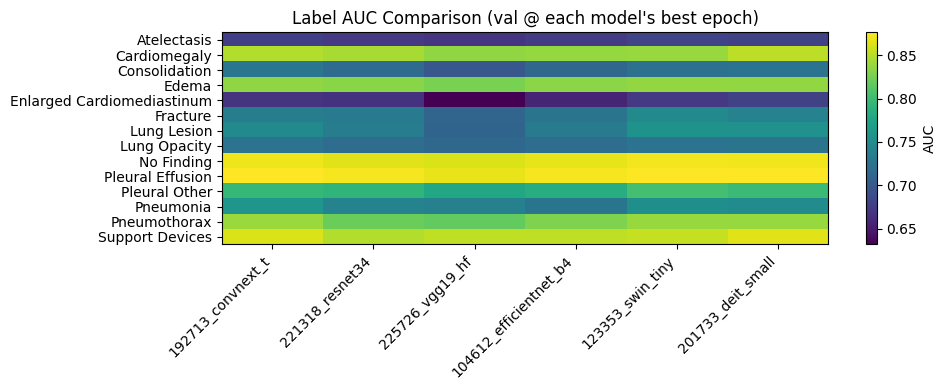


Winners per label (val @ each model's best epoch):
                                   best_model  best_auc             worst_model  worst_auc
group_name                                                                                
Pleural Effusion            201733_deit_small  0.876459         225726_vgg19_hf   0.868071
No Finding                   123353_swin_tiny  0.872140         225726_vgg19_hf   0.862901
Support Devices             201733_deit_small  0.865858         221318_resnet34   0.848551
Cardiomegaly                201733_deit_small  0.851831         225726_vgg19_hf   0.835981
Pneumothorax                192713_convnext_t  0.840064         225726_vgg19_hf   0.817663
Edema                       201733_deit_small  0.836463         225726_vgg19_hf   0.827688
Pleural Other                123353_swin_tiny  0.803482         225726_vgg19_hf   0.778828
Pneumonia                   192713_convnext_t  0.759584  104612_efficientnet_b4   0.726886
Lung Lesion                  123353_sw

In [5]:
# Visualizations + analysis for EACH auc_by_epoch CSV in `tables`
# Expected columns: epoch, split, group_type, group_name, auc, model_name, seed, run_id

import matplotlib.pyplot as plt

# -----------------------------
# 0) Helpers
# -----------------------------
def _ensure_cols(df, cols):
    missing = [c for c in cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing columns {missing}. Found: {list(df.columns)}")

def macro_auc_by_epoch(df, split="val", group_type="label"):
    """Macro-average AUC across group_name for each epoch (per model)."""
    _ensure_cols(df, ["epoch","split","group_type","group_name","auc"])
    sub = df[(df["split"] == split) & (df["group_type"] == group_type)].copy()
    sub["auc"] = pd.to_numeric(sub["auc"], errors="coerce")
    out = (sub.groupby("epoch", as_index=False)["auc"].mean()
             .rename(columns={"auc": "macro_auc"}))
    return out

def best_epoch_macro(df, split="val", group_type="label"):
    """Return best epoch by macro AUC."""
    m = macro_auc_by_epoch(df, split=split, group_type=group_type)
    if m.empty:
        return None, None
    row = m.loc[m["macro_auc"].idxmax()]
    return int(row["epoch"]), float(row["macro_auc"])

def label_auc_at_epoch(df, epoch, split="val", group_type="label"):
    """Return label-wise AUC at a specific epoch."""
    _ensure_cols(df, ["epoch","split","group_type","group_name","auc"])
    sub = df[(df["split"] == split) & (df["group_type"] == group_type) & (df["epoch"] == epoch)].copy()
    sub["auc"] = pd.to_numeric(sub["auc"], errors="coerce")
    return sub[["group_name","auc"]].sort_values("auc", ascending=False)

def get_model_id(df, fallback_name):
    """Prefer model_name from df, else use the tables key."""
    if "model_name" in df.columns and df["model_name"].notna().any():
        return str(df["model_name"].dropna().iloc[0])
    return fallback_name

def safe_title(s):
    return re.sub(r"\s+", " ", str(s)).strip()

# -----------------------------
# 1) Quick per-CSV summaries
# -----------------------------
summ_rows = []
for key, df in tables.items():
    model_id = get_model_id(df, key)
    be, ba = best_epoch_macro(df, split="val", group_type="label")
    summ_rows.append({
        "table_key": key,
        "model_id": model_id,
        "n_rows": len(df),
        "epochs": df["epoch"].nunique() if "epoch" in df.columns else np.nan,
        "best_epoch_val_macro": be,
        "best_val_macro_auc": ba,
    })
summary = pd.DataFrame(summ_rows).sort_values("best_val_macro_auc", ascending=False)
print(summary.to_string(index=False))

# -----------------------------
# 2) Plot 1: Macro AUC vs epoch for EACH model (val)
# -----------------------------
plt.figure()
for key, df in tables.items():
    model_id = get_model_id(df, key)
    m = macro_auc_by_epoch(df, split="val", group_type="label")
    if not m.empty:
        plt.plot(m["epoch"], m["macro_auc"], marker="o", label=safe_title(model_id))
plt.xlabel("Epoch")
plt.ylabel("Val Macro AUC (avg over labels)")
plt.title("Validation Macro AUC by Epoch (all models)")
plt.legend()
plt.show()

# -----------------------------
# 3) Plot 2: Per-model plot of label AUC distribution at BEST epoch (val)
#    - shows top/bottom labels, plus a simple bar chart for each model
# -----------------------------
TOPK = 8  # how many labels to display in bar plot (top K by AUC)

for key, df in tables.items():
    model_id = get_model_id(df, key)
    be, ba = best_epoch_macro(df, split="val", group_type="label")
    if be is None:
        print(f"\n[{model_id}] No matching rows for split='val', group_type='label'.")
        continue

    lab = label_auc_at_epoch(df, be, split="val", group_type="label")
    print(f"\n[{model_id}] Best epoch = {be}, Val macro AUC = {ba:.4f}")
    print("Top labels:")
    print(lab.head(5).to_string(index=False))
    print("Bottom labels:")
    print(lab.tail(5).to_string(index=False))

    # Bar plot: top K labels at best epoch
    show = lab.head(TOPK).iloc[::-1]  # reverse so best is at top visually
    plt.figure()
    plt.barh(show["group_name"], show["auc"])
    plt.xlabel("AUC")
    plt.ylabel("Label")
    plt.title(f"{safe_title(model_id)}: Top {TOPK} label AUCs at best epoch {be} (val)")
    plt.show()

# -----------------------------
# 4) Heatmap-style matrix (labels x models) at each model's BEST epoch (val)
#    This helps compare which model is best for which label.
# -----------------------------
# Build a matrix: index=label, columns=model, values=auc at each model's best epoch
label_model = []
for key, df in tables.items():
    model_id = get_model_id(df, key)
    be, _ = best_epoch_macro(df, split="val", group_type="label")
    if be is None:
        continue
    lab = label_auc_at_epoch(df, be, split="val", group_type="label")
    lab = lab.rename(columns={"auc": model_id})
    label_model.append(lab.set_index("group_name")[model_id])

mat = pd.concat(label_model, axis=1).sort_index()
print("\nLabel x Model AUC matrix (val at each model's best epoch):")
print(mat.head().to_string())

# Plot as an image (matplotlib imshow). Missing values become NaN.
plt.figure(figsize=(10, max(4, 0.25 * len(mat.index))))
img = plt.imshow(mat.values, aspect="auto", interpolation="nearest")
plt.colorbar(img, label="AUC")
plt.yticks(range(len(mat.index)), mat.index)
plt.xticks(range(len(mat.columns)), mat.columns, rotation=45, ha="right")
plt.title("Label AUC Comparison (val @ each model's best epoch)")
plt.tight_layout()
plt.show()

# -----------------------------
# 5) “Winner per label” table
# -----------------------------
winner = pd.DataFrame({
    "best_model": mat.idxmax(axis=1),
    "best_auc": mat.max(axis=1),
    "worst_model": mat.idxmin(axis=1),
    "worst_auc": mat.min(axis=1),
}).sort_values("best_auc", ascending=False)

print("\nWinners per label (val @ each model's best epoch):")
print(winner.head(15).to_string())

# If you want to save:
# summary.to_csv("model_macro_summary.csv", index=False)
# winner.to_csv("label_winners.csv", index=True)
# mat.to_csv("label_model_auc_matrix.csv", index=True)
